In [ ]:
#------>> Unsuppervised learning algorithm 

#K means Clustering 

# k means clustering is an unsupervised learning algorithm that will attempt to group similar clusters togethetr from your data.

#It is mainly used in

#Clustering similar documents

#Clustering customers based on similar features


In [2]:
from sklearn.datasets import make_blobs
# The make_blobs functions is used togenerate Synthetic datasets for clustering and classification tasks.
# This function will create clusters of data points with Gaussian distribution 

In [277]:
# Creating random dataset 
data=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=3,random_state=101)

#n_samples=Total number of points equally divided among the clusters 

#n_features=It indicates the number of features(columns)

#centers=It determine number of clusters to be generated

#cluster_std=It sets the standard deviation of the clusters.High value makes the clusters to spread out 

In [278]:
data

(array([[ -1.09197234,   0.47142818],
        [-10.60378237,  -1.33913603],
        [ -0.4277183 ,  -0.32100904],
        [ -3.82078774,   5.86083823],
        [-13.34996239, -11.46833887],
        [ -1.98601326,   1.74478397],
        [  6.72751203,   7.66728821],
        [ -2.65181795,   2.00375025],
        [-12.51924694, -11.14413349],
        [  0.89405848,  -0.86326443],
        [  0.12144164,   6.24224337],
        [  2.2813264 ,   0.4553976 ],
        [  2.25338909,  -1.30194797],
        [  6.52590045,   8.91660091],
        [  5.33801735,   8.77282445],
        [  2.24433359,   2.40229063],
        [ -9.6984108 ,  -4.47386766],
        [  3.21234702,  -5.01028514],
        [-17.64149926,  -2.00188054],
        [ -8.39989791,  -5.98074093],
        [  5.36392258,   6.10640381],
        [ -7.02412736, -11.57217722],
        [ -7.11460535,  -5.686917  ],
        [  3.23971238,   3.63825322],
        [ -4.1744722 ,  -4.4829267 ],
        [  2.27541579,   2.49017331],
        [ -5

In [279]:
import matplotlib.pyplot as plt

In [280]:
x,y=data

Text(0.5, 1.0, 'Scatter Plot for K means')

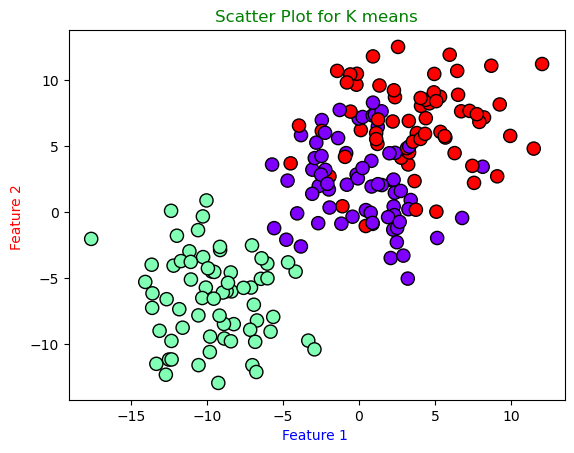

In [281]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow',edgecolor='black',s=90)
plt.xlabel("Feature 1 ",c='b')
plt.ylabel("Feature 2 ",c='r')
plt.title("Scatter Plot for K means",c='g')

In [282]:
data[0].shape

(200, 2)

In [283]:
from sklearn.cluster import KMeans

In [284]:
kmeans=KMeans(n_clusters=3)

In [285]:
kmeans

KMeans(n_clusters=3)

In [286]:
kmeans.fit(data[0])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [287]:
kmeans.cluster_centers_

array([[-9.50940772, -6.45940553],
       [ 3.90163124,  7.26675744],
       [-0.21350997,  1.42440804]])

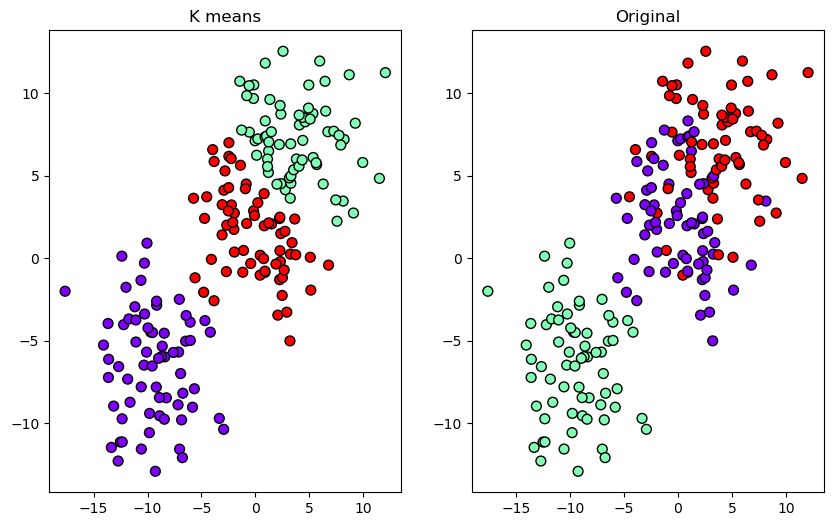

In [288]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.set_title('K means')  #Predicted Data
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap="rainbow",s=50,edgecolor='black')
ax2.set_title("Original")   #Original Data
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow",s=50,edgecolor='black')

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\HP\Downloads\College_Data.unknown")

In [397]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [398]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [399]:
df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [401]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [402]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [403]:
# To check whether there is duplicate data

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
772    False
773    False
774    False
775    False
776    False
Length: 777, dtype: bool

In [404]:
if not df[df.duplicated()].empty:
    print(df[df.duplicated()])
else:
    print("No Duplicates")

No Duplicates


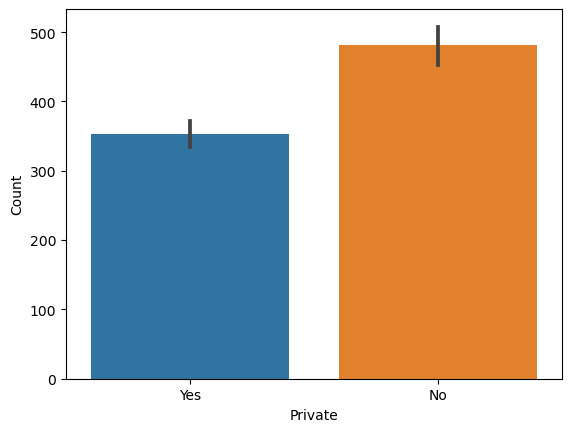

In [405]:
sns.barplot(x=df['Private'],y=df.index)
plt.xlabel('Private')
plt.ylabel('Count')
plt.savefig("comparision.png")

<Axes: xlabel='Private', ylabel='Count'>

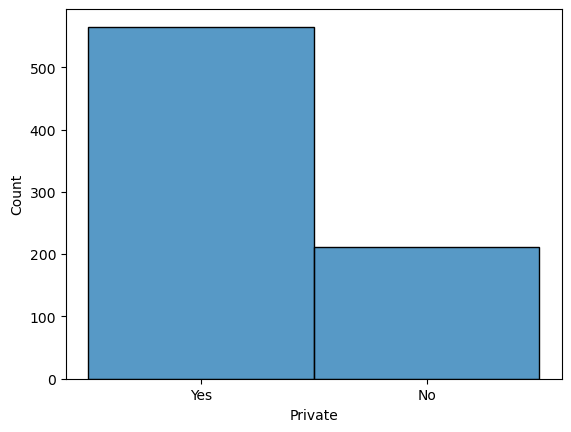

In [406]:
sns.histplot(df['Private'])

In [407]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [408]:
df['Grad.Rate'].max()

118

<Axes: xlabel='Private', ylabel='Grad.Rate'>

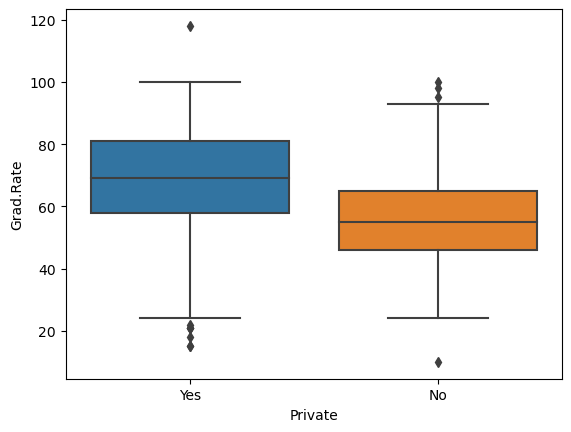

In [409]:
sns.boxplot(x='Private',y='Grad.Rate',data=df)

In [410]:
(df['Grad.Rate']).max()

118

In [418]:
df[df['Grad.Rate']==118] 

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [420]:
df['Grad.Rate']=df['Grad.Rate'].replace({118:100})

In [394]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [428]:
df[df['Grad.Rate']==100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100
126,College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
238,Grove City College,Yes,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
250,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
251,Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
317,Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
377,Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
511,Santa Clara University,Yes,4019,2779,888,40,73,3891,128,13584,5928,630,1278,88,92,13.9,19,10872,100
522,Siena College,Yes,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100


In [432]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=2)

In [443]:
features=df.iloc[:,2:]
features

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [447]:
#Convert all columns datatype tostring , to apply StandardScaler()

features.columns=features.columns.astype(str)

from sklearn.preprocessing import StandardScaler

# StandardScaler --->> Is a preprocessing class that is used to standardise or normalise the features of dataset.
#v It scales each feature in such a way that it has a mean of 0 and Std of 1

In [450]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)


scaled_features.shape
kmeans=KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [456]:
df['Cluster']=kmeans.fit_predict(scaled_features)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [458]:
df['Cluster']

0      0
1      0
2      0
3      1
4      0
      ..
772    0
773    0
774    0
775    1
776    0
Name: Cluster, Length: 777, dtype: int32

In [459]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [466]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [467]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))

[[486   0]
 [  0 291]]


In [469]:
print(accuracy_score(kmeans.labels_,df['Cluster']))

1.0


In [470]:
features.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [474]:
features['P.Undergrad']

0       537
1      1227
2        99
3        63
4       869
       ... 
772    2029
773    1107
774     166
775      83
776    1726
Name: P.Undergrad, Length: 777, dtype: int64

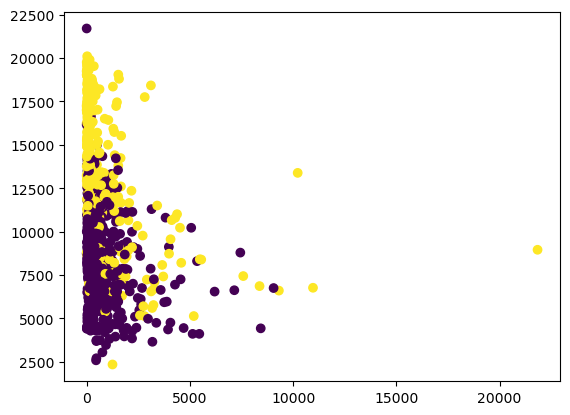

In [481]:
plt.scatter(features['P.Undergrad'],features['Outstate'],c=kmeans.labels_)

<BarContainer object of 777 artists>

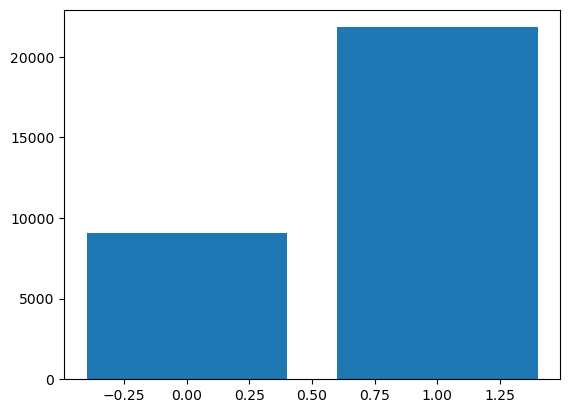

In [487]:
plt.bar(kmeans.labels_,features['P.Undergrad'])

<BarContainer object of 777 artists>

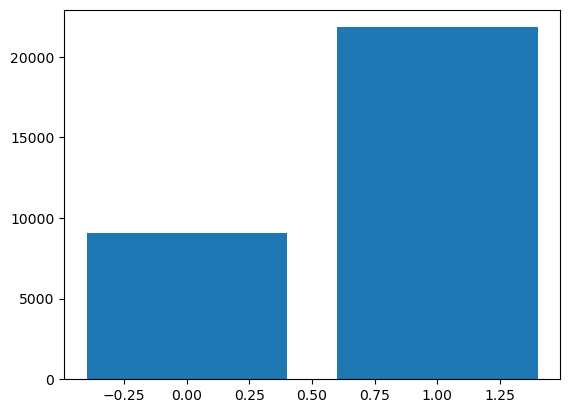

In [485]:
plt.bar(df['Cluster'],features['P.Undergrad'])

In [488]:
# Diff between KNN and K means  Clustering 

#1.) 

#KNN is used for Classification and regression 
#K means is used for Clustering problems 

#2.)

#KNN is supervised lgorithm
#K means is unsupervised algorithm

#3.)

#To training KNN, we need a dataset with all the data points having class labels
# For training K means,we no need any such information 

#4.)

#we use KNN to predict the class label or new points 
#we use K means to find patterns in a given dataset by grouping datapoints into clusters

In [489]:
df_1=pd.read_csv(r"C:\Users\HP\Desktop\Classified Data.unknown")

In [492]:
df_1.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [597]:
df_1=pd.read_csv(r"C:\Users\HP\Desktop\Classified Data.unknown",index_col=0)

In [598]:
df_1

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [599]:
df_1=pd.read_csv(r"C:\Users\HP\Desktop\Classified Data.unknown",index_col="EQW")

In [600]:
df_1

,Unnamed: 0,WTT,PTI,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
EQW,,,,,,,,,,,
0.567946,0,0.913917,1.162073,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.535342,1,0.635632,1.003722,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.921990,2,0.721360,1.201493,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
0.653046,3,1.234204,1.386726,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
0.627280,4,1.279491,0.949750,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
0.853116,995,1.010953,1.034006,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
0.941835,996,0.575529,0.955786,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
0.781905,997,1.135470,0.982462,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1


In [601]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [602]:
scalar.fit(df_1.drop("TARGET CLASS",axis=1))

StandardScaler()

In [603]:
Scaled_features=scalar.transform(df_1.drop("TARGET CLASS",axis=1))

In [604]:
Scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [605]:
df_feat=pd.DataFrame(Scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.730320,-0.123542,0.185907,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [606]:
# Example StandardScaler is calculated as:

data=np.array([[0,0],[0,1],[1,0],[1,1,]])
data

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [607]:
scl=StandardScaler()
scl

StandardScaler()

In [608]:
scl_data=scl.fit_transform(data)

In [609]:
data

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [610]:
scl_data

array([[-1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1.,  1.]])

In [611]:
scl_data.mean()

0.0

In [612]:
scl_data.std()

1.0

In [613]:
df_1.head()

,Unnamed: 0,WTT,PTI,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
EQW,,,,,,,,,,,
0.567946,0,0.913917,1.162073,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.535342,1,0.635632,1.003722,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.921990,2,0.721360,1.201493,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
0.653046,3,1.234204,1.386726,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
0.627280,4,1.279491,0.949750,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [614]:
df_feat.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.730320,-0.123542,0.185907,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [615]:
#To name the columns
df_feat=pd.DataFrame(Scaled_features,columns=df_1.columns[:-1])

In [616]:
df_feat

,Unnamed: 0,WTT,PTI,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [617]:
df_feat.isna().sum()

Unnamed: 0    0
WTT           0
PTI           0
SBI           0
LQE           0
QWG           0
FDJ           0
PJF           0
HQE           0
NXJ           0
dtype: int64

In [618]:
from sklearn.model_selection import train_test_split 

In [619]:
x=df_feat
y=df_1["TARGET CLASS"]

In [620]:
x

,Unnamed: 0,WTT,PTI,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [621]:
y

EQW
0.567946    1
0.535342    0
0.921990    0
0.653046    1
0.627280    1
           ..
0.853116    1
0.941835    0
0.781905    1
0.407158    1
0.417006    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [622]:
from sklearn.neighbors import KNeighborsClassifier

In [623]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [624]:
x.shape

(1000, 10)

In [625]:
x_train.shape

(700, 10)

In [626]:
x_test.shape

(300, 10)

In [627]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [628]:
KNN

KNeighborsClassifier(n_neighbors=3)

In [629]:
#To Train model
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [632]:
pred=KNN.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], d

In [633]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,y_test)

In [634]:
acc

0.8633333333333333

In [652]:
# To find the error rate

err_rate=[]
for val in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=val)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    err_rate.append(np.mean(pred_i!=y_test))

In [653]:
err_rate

[0.13666666666666666,
 0.14,
 0.13666666666666666,
 0.13333333333333333,
 0.11666666666666667,
 0.12333333333333334,
 0.11333333333333333,
 0.11,
 0.10333333333333333,
 0.10333333333333333,
 0.10666666666666667,
 0.11,
 0.1,
 0.09666666666666666,
 0.09666666666666666,
 0.10333333333333333,
 0.09666666666666666,
 0.09333333333333334,
 0.1,
 0.09333333333333334,
 0.09333333333333334,
 0.1,
 0.09666666666666666,
 0.09333333333333334,
 0.09333333333333334,
 0.1,
 0.09666666666666666,
 0.09333333333333334,
 0.09]

In [658]:
len(err_rate)

29

In [657]:
np.random.randint(20,30)

24

Text(0, 0.5, 'Error Rate')

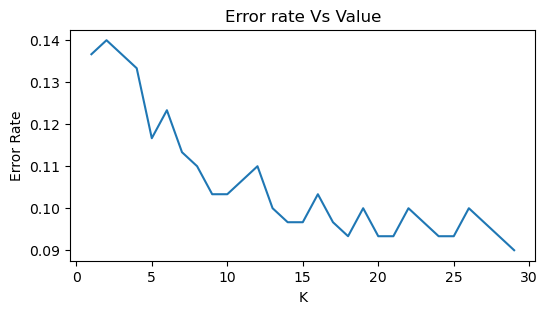

In [660]:
plt.figure(figsize=(6,3))
plt.plot(range(1,30),err_rate)
plt.title("Error rate Vs Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [665]:
#Project:6

df_2=pd.read_csv(r"C:\Users\HP\Desktop\cancerKNNAlgorithmDataset.csv")

In [666]:
df_2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [667]:
df_2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [669]:
df_2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64